In [24]:
!pip install geopandas
!pip install unrar

In [28]:
!unrar x /content/Indonesia_Kab_Kota.rar -y


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Indonesia_Kab_Kota.rar

Extracting  SHP/Indo_Kab_Kot.cpg                                           0%  OK 
Extracting  SHP/Indo_Kab_Kot.dbf                                           0%  OK 
Extracting  SHP/Indo_Kab_Kot.prj                                           0%  OK 
Extracting  SHP/Indo_Kab_Kot.sbn                                           0%  OK 
Extracting  SHP/Indo_Kab_Kot.sbx                                           0%  OK 
Extracting  SHP/Indo_Kab_Kot.shp                                           0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 

In [6]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
df = pd.read_excel('/content/Tingkat Penghunian Kamar pada Hotel Bintang 2020.xlsx', skiprows=2, skipfooter=2)
df = df.dropna().drop('Tahunan', axis=1)

In [64]:
column_names = df.columns.to_list()
column_names[0] = 'wilayah'
df.columns = column_names
df

,wilayah,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember
0,ACEH,35.36,39.33,33.57,13.86,8.75,13.73,18.23,14.44,25.14,30.11,37.71,31.76
1,SUMATERA UTARA,48.06,45.24,29.20,11.93,13.82,20.12,26.92,29.38,33.15,36.09,34.41,41.02
2,SUMATERA BARAT,44.21,46.55,32.34,9.09,11.27,21.14,32.18,39.36,31.57,39.45,47.49,53.44
3,RIAU,42.49,44.09,26.71,14.73,21.34,26.85,29.04,32.71,31.14,36.16,42.92,36.39
4,JAMBI,41.66,42.69,35.19,15.68,15.73,25.32,32.54,37.81,41.55,38.88,40.93,40.74
5,SUMATERA SELATAN,48.11,53.22,39.86,19.43,18.94,32.09,39.54,42.10,42.81,47.55,48.92,53.83
6,BENGKULU,43.11,61.85,38.71,13.98,15.97,21.92,39.33,41.40,38.92,49.88,45.45,45.00
7,LAMPUNG,57.88,57.38,35.79,13.94,14.36,34.73,40.31,48.71,49.15,54.28,59.14,59.32
8,KEP. BANGKA BELITUNG,27.35,30.88,18.87,16.63,15.89,20.93,17.03,23.23,20.26,24.63,28.42,28.79
9,KEP. RIAU,46.49,35.58,25.27,11.37,9.91,14.45,20.16,19.31,16.91,21.59,24.64,27.41


In [38]:
df['wilayah'] = df['wilayah'].apply(str.lower)
df['year_avg'] = df[column_names[1:]].mean(axis=1)
df

,wilayah,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,year_avg
0,aceh,35.36,39.33,33.57,13.86,8.75,13.73,18.23,14.44,25.14,30.11,37.71,31.76,25.165833
1,sumatera utara,48.06,45.24,29.20,11.93,13.82,20.12,26.92,29.38,33.15,36.09,34.41,41.02,30.778333
2,sumatera barat,44.21,46.55,32.34,9.09,11.27,21.14,32.18,39.36,31.57,39.45,47.49,53.44,34.007500
3,riau,42.49,44.09,26.71,14.73,21.34,26.85,29.04,32.71,31.14,36.16,42.92,36.39,32.047500
4,jambi,41.66,42.69,35.19,15.68,15.73,25.32,32.54,37.81,41.55,38.88,40.93,40.74,34.060000
5,sumatera selatan,48.11,53.22,39.86,19.43,18.94,32.09,39.54,42.10,42.81,47.55,48.92,53.83,40.533333
6,bengkulu,43.11,61.85,38.71,13.98,15.97,21.92,39.33,41.40,38.92,49.88,45.45,45.00,37.960000
7,lampung,57.88,57.38,35.79,13.94,14.36,34.73,40.31,48.71,49.15,54.28,59.14,59.32,43.749167
8,kep. bangka belitung,27.35,30.88,18.87,16.63,15.89,20.93,17.03,23.23,20.26,24.63,28.42,28.79,22.742500
9,kep. riau,46.49,35.58,25.27,11.37,9.91,14.45,20.16,19.31,16.91,21.59,24.64,27.41,22.757500


In [39]:
geo_df = gpd.read_file('/content/SHP/Indo_Kab_Kot.shp')
geo_df['PROVINSI'] = geo_df['PROVINSI'].apply(str.lower)

In [40]:
joined_df = df.merge(geo_df, left_on='wilayah', right_on='PROVINSI')
joined_df

,wilayah,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,year_avg,PROVNO,KABKOTNO,PROVINSI,KABKOT,geometry
0,aceh,35.36,39.33,33.57,13.86,8.75,13.73,18.23,14.44,25.14,30.11,37.71,31.76,25.165833,11,01,aceh,SIMEULUE,"MULTIPOLYGON Z (((96.66509 2.12018 0.00000, 96..."
1,aceh,35.36,39.33,33.57,13.86,8.75,13.73,18.23,14.44,25.14,30.11,37.71,31.76,25.165833,11,02,aceh,ACEH SINGKIL,"MULTIPOLYGON Z (((97.95406 2.57693 0.00000, 97..."
2,aceh,35.36,39.33,33.57,13.86,8.75,13.73,18.23,14.44,25.14,30.11,37.71,31.76,25.165833,11,02,aceh,ACEH SINGKIL,"MULTIPOLYGON Z (((97.39711 2.03835 0.00000, 97..."
3,aceh,35.36,39.33,33.57,13.86,8.75,13.73,18.23,14.44,25.14,30.11,37.71,31.76,25.165833,11,03,aceh,ACEH SELATAN,"MULTIPOLYGON Z (((97.59461 2.80777 0.00000, 97..."
4,aceh,35.36,39.33,33.57,13.86,8.75,13.73,18.23,14.44,25.14,30.11,37.71,31.76,25.165833,11,04,aceh,ACEH TENGGARA,"POLYGON Z ((97.82461 3.74953 0.00000, 97.82177..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,papua,41.14,51.43,32.88,17.16,19.56,27.09,17.49,28.97,38.44,46.58,55.22,36.25,34.350833,94,33,papua,PUNCAK,"POLYGON Z ((137.40540 -2.98613 0.00000, 137.40..."
496,papua,41.14,51.43,32.88,17.16,19.56,27.09,17.49,28.97,38.44,46.58,55.22,36.25,34.350833,94,34,papua,DOGIYAI,"POLYGON Z ((136.09374 -3.75452 0.00000, 136.10..."
497,papua,41.14,51.43,32.88,17.16,19.56,27.09,17.49,28.97,38.44,46.58,55.22,36.25,34.350833,94,35,papua,INTAN JAYA,"POLYGON Z ((136.30963 -2.91129 0.00000, 136.31..."
498,papua,41.14,51.43,32.88,17.16,19.56,27.09,17.49,28.97,38.44,46.58,55.22,36.25,34.350833,94,36,papua,DEIYAI,"POLYGON Z ((136.48040 -4.01226 0.00000, 136.49..."


In [41]:
joined_geo_df = gpd.GeoDataFrame(joined_df, geometry='geometry')

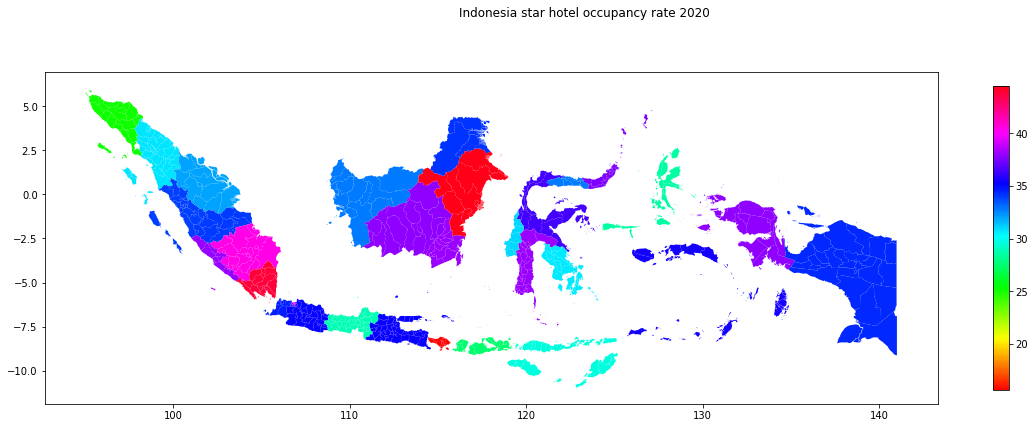

In [70]:
fig, ax = plt.subplots(1, 1, figsize = (20, 12))
joined_geo_df.plot('year_avg', ax=ax, cmap='hsv', legend=True, legend_kwds={'shrink': 0.3})
fig.suptitle('Indonesia star hotel occupancy rate 2020')
plt.subplots_adjust(top=1.3)
plt.show()

In [66]:
df = pd.read_excel('/content/Tingkat Penghunian Kamar pada Hotel Bintang 2021.xlsx', skiprows=2, skipfooter=2)
df = df.dropna().drop(['Tahunan', 'Agustus', 'September', 'Oktober', 'November', 'Desember'], axis=1)
df

,Unnamed: 0,Januari,Februari,Maret,April,Mei,Juni,Juli
0,ACEH,20.13,17.65,33.42,26.45,26.08,28.09,26.88
1,SUMATERA UTARA,37.63,36.58,37.67,36.96,33.91,39.10,29.87
2,SUMATERA BARAT,37.27,36.04,42.02,35.23,32.21,49.72,28.13
3,RIAU,36.69,38.16,38.69,34.53,31.54,33.40,34.42
4,JAMBI,26.50,38.42,41.57,38.96,33.67,45.13,28.78
5,SUMATERA SELATAN,45.85,46.11,48.24,44.41,43.55,53.42,41.70
6,BENGKULU,31.96,37.65,36.73,33.37,33.25,45.54,24.61
7,LAMPUNG,37.63,40.52,43.98,40.78,34.29,49.65,24.65
8,KEP. BANGKA BELITUNG,18.70,15.06,20.98,17.44,15.24,23.92,15.75
9,KEP. RIAU,24.41,27.99,27.01,20.69,20.92,23.03,19.10


In [67]:
column_names = df.columns.to_list()
column_names[0] = 'wilayah'
df.columns = column_names
df

,wilayah,Januari,Februari,Maret,April,Mei,Juni,Juli
0,ACEH,20.13,17.65,33.42,26.45,26.08,28.09,26.88
1,SUMATERA UTARA,37.63,36.58,37.67,36.96,33.91,39.10,29.87
2,SUMATERA BARAT,37.27,36.04,42.02,35.23,32.21,49.72,28.13
3,RIAU,36.69,38.16,38.69,34.53,31.54,33.40,34.42
4,JAMBI,26.50,38.42,41.57,38.96,33.67,45.13,28.78
5,SUMATERA SELATAN,45.85,46.11,48.24,44.41,43.55,53.42,41.70
6,BENGKULU,31.96,37.65,36.73,33.37,33.25,45.54,24.61
7,LAMPUNG,37.63,40.52,43.98,40.78,34.29,49.65,24.65
8,KEP. BANGKA BELITUNG,18.70,15.06,20.98,17.44,15.24,23.92,15.75
9,KEP. RIAU,24.41,27.99,27.01,20.69,20.92,23.03,19.10


In [68]:
df['wilayah'] = df['wilayah'].apply(str.lower)
df['year_avg_to_date'] = df[column_names[1:]].mean(axis=1)
df

,wilayah,Januari,Februari,Maret,April,Mei,Juni,Juli,year_avg_to_date
0,aceh,20.13,17.65,33.42,26.45,26.08,28.09,26.88,25.528571
1,sumatera utara,37.63,36.58,37.67,36.96,33.91,39.10,29.87,35.960000
2,sumatera barat,37.27,36.04,42.02,35.23,32.21,49.72,28.13,37.231429
3,riau,36.69,38.16,38.69,34.53,31.54,33.40,34.42,35.347143
4,jambi,26.50,38.42,41.57,38.96,33.67,45.13,28.78,36.147143
5,sumatera selatan,45.85,46.11,48.24,44.41,43.55,53.42,41.70,46.182857
6,bengkulu,31.96,37.65,36.73,33.37,33.25,45.54,24.61,34.730000
7,lampung,37.63,40.52,43.98,40.78,34.29,49.65,24.65,38.785714
8,kep. bangka belitung,18.70,15.06,20.98,17.44,15.24,23.92,15.75,18.155714
9,kep. riau,24.41,27.99,27.01,20.69,20.92,23.03,19.10,23.307143


In [69]:
joined_df = df.merge(geo_df, left_on='wilayah', right_on='PROVINSI')
joined_df

,wilayah,Januari,Februari,Maret,April,Mei,Juni,Juli,year_avg_to_date,PROVNO,KABKOTNO,PROVINSI,KABKOT,geometry
0,aceh,20.13,17.65,33.42,26.45,26.08,28.09,26.88,25.528571,11,01,aceh,SIMEULUE,"MULTIPOLYGON Z (((96.66509 2.12018 0.00000, 96..."
1,aceh,20.13,17.65,33.42,26.45,26.08,28.09,26.88,25.528571,11,02,aceh,ACEH SINGKIL,"MULTIPOLYGON Z (((97.95406 2.57693 0.00000, 97..."
2,aceh,20.13,17.65,33.42,26.45,26.08,28.09,26.88,25.528571,11,02,aceh,ACEH SINGKIL,"MULTIPOLYGON Z (((97.39711 2.03835 0.00000, 97..."
3,aceh,20.13,17.65,33.42,26.45,26.08,28.09,26.88,25.528571,11,03,aceh,ACEH SELATAN,"MULTIPOLYGON Z (((97.59461 2.80777 0.00000, 97..."
4,aceh,20.13,17.65,33.42,26.45,26.08,28.09,26.88,25.528571,11,04,aceh,ACEH TENGGARA,"POLYGON Z ((97.82461 3.74953 0.00000, 97.82177..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,papua,35.00,32.64,43.28,33.69,38.90,44.93,40.16,38.371429,94,33,papua,PUNCAK,"POLYGON Z ((137.40540 -2.98613 0.00000, 137.40..."
496,papua,35.00,32.64,43.28,33.69,38.90,44.93,40.16,38.371429,94,34,papua,DOGIYAI,"POLYGON Z ((136.09374 -3.75452 0.00000, 136.10..."
497,papua,35.00,32.64,43.28,33.69,38.90,44.93,40.16,38.371429,94,35,papua,INTAN JAYA,"POLYGON Z ((136.30963 -2.91129 0.00000, 136.31..."
498,papua,35.00,32.64,43.28,33.69,38.90,44.93,40.16,38.371429,94,36,papua,DEIYAI,"POLYGON Z ((136.48040 -4.01226 0.00000, 136.49..."


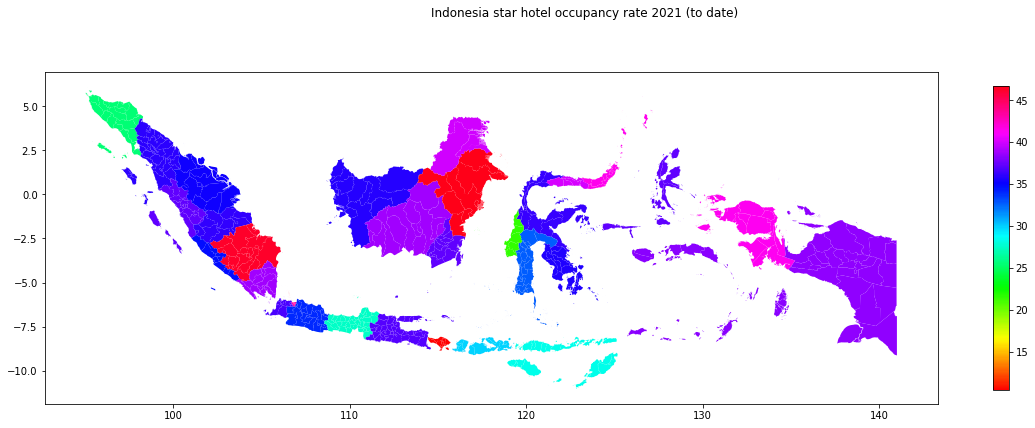

In [72]:
joined_geo_df = gpd.GeoDataFrame(joined_df, geometry='geometry')
fig, ax = plt.subplots(1, 1, figsize = (20, 12))
joined_geo_df.plot('year_avg_to_date', ax=ax, cmap='hsv', legend=True, legend_kwds={'shrink': 0.3})
fig.suptitle('Indonesia star hotel occupancy rate 2021 (to date)')
plt.subplots_adjust(top=1.3)
plt.show()